# Dry Bean Dataset Analysis

## Work specification

The main purpose of this project is to test and compare **Supervised Learning** models.

We are given a dataset which contains various features regarding dry beans. Our goal is to develop a model which will take in features of data beans and in turn will preidct whether a given bean's species type.

## Group

- Eduardo Correia - up201806433
- João Cardoso - up201806531
- Ricardo Fontão - up201806317

# Used libraries

* [scikit-learn](https://scikit-learn.org/)
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [imblearn](https://imbalanced-learn.org/stable/)

# Importing the dataset

In [1]:
import pandas as pd
import os 

bean_data = pd.read_excel(os.getcwd() + "/../input/Dry_Bean_Dataset.xls")
bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [2]:
bean_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Attribute Information

1) **Area (A):** The area of a bean zone and the number of pixels within its boundaries.  
2) **Perimeter (P):** Bean circumference is defined as the length of its border.  
3) **Major axis length (L):** The distance between the ends of the longest line that can be drawn from a bean.  
4) **Minor axis length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.  
5) **Aspect ratio (K):** Defines the relationship between L and l.  
6) **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.  
7) **Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.  
8) **Equivalent diameter (Ed):** The diameter of a circle having the same area as a bean seed area.  
9) **Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.  
10) **Solidity (S):** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  
11) **Roundness (R):** Calculated with the following formula: (4piA)/(P^2)  
12) **Compactness (CO):** Measures the roundness of an object: Ed/L  
13) **ShapeFactor1 (SF1)**  
14) **ShapeFactor2 (SF2)**  
15) **ShapeFactor3 (SF3)**  
16) **ShapeFactor4 (SF4)**   
17) **Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira**  

First we check for missing data:

In [3]:
bean_data.isnull().any().sum()

0

No missing values were found. Next we create a plot of the dataset with a color for each class:

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
# sb.pairplot(bean_data.sample(100), hue='Class')
# ;

![Big plot](out.png)

## Removing outliers

As can be seen in the graph above, there are clearly some outliers in our dataset.

Since it's not mentioned in the initial problem's statement if these outliers are to be expected or not, we decided not to remove them.

## Checking for the amount of each bean in the dataset

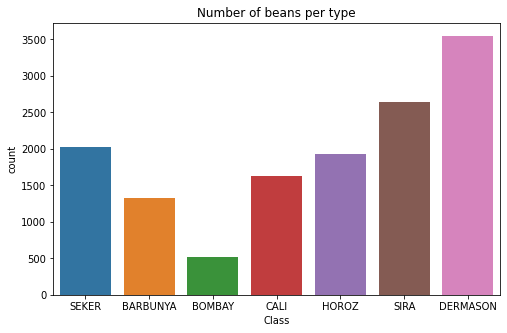

In [5]:
plt.figure(figsize = (8, 5))

sb.countplot(x = bean_data["Class"])
plt.title("Number of beans per type")
plt.show()

As it is noticeable, there's a huge discrepancy between the least (Bombay) and most (Dermason) common bean species, with a difference of a factor of 6. We will take this into account when choosing the scoring function used to compare the models. 

# Feature Selection

Our next step is to create a correlation matrix to compare how each feautre correlates to eachother and to the Class label. For that we need to encode the Class label so that the correlation can be calculated. 

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(bean_data['Class'])
bean_data['Class'] = le.transform(bean_data['Class'])

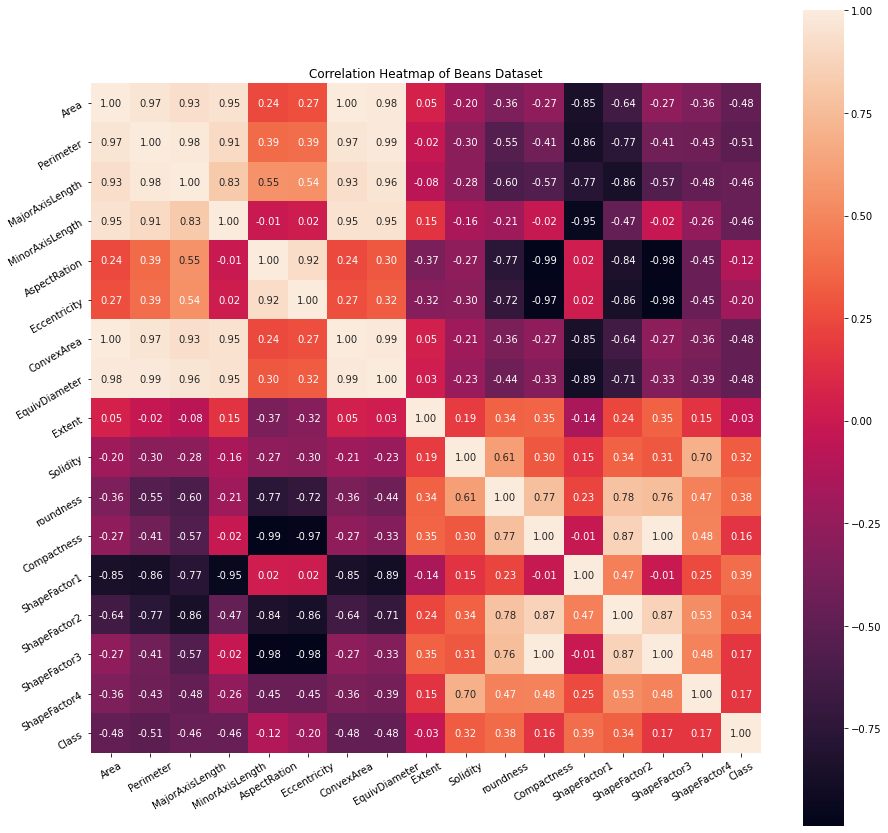

In [8]:
corr_matrix = bean_data.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

From this correlation matrix we can exctract features that are strongly correlated with eachother. Since we have a mirrored matrix the analysis can be done by just exctracting the upper matrix triangle and searching for values with an absolute value of more than 0.9 which is our criteria for correlated features.   

The first set of features correlated are:
* Area
* Perimeter
* MajorAxisLength
* MinorAxisLength
* ConvexArea
* EquivDiameter
* ShapeFactor1 -> even though this feature only has high correlation(>0.9) with MinorAxisLength it presents >0.85 correlation with all other features here presented so we'll include it here


The feature to remove is the one that presents the highest correlation with the Class label which in this case is the **Perimeter**.

The second set of correlated features are:
* ShapeFactor3
* Compactness
* Eccentricity
* AspectRation

From this set of features the retained one is **Eccentricity**.

So the following features will be dropped:
* ShapeFactor3
* Compactness
* AspectRation
* Area
* MajorAxisLength
* MinorAxisLength
* ConvexArea
* EquivDiameter
* ShapeFactor1

In [9]:
original_bean_data = bean_data

original_bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [10]:
bean_data = bean_data.drop(['ShapeFactor3', 
                            'Compactness',
                            'AspectRation',
                            'Area',
                            'MajorAxisLength',
                            'MinorAxisLength',
                            'ConvexArea',
                            'EquivDiameter',
                            'ShapeFactor1'], axis = 1)

bean_data.head()

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,610.291,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724,5
1,638.018,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430,5
2,624.110,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066,5
3,645.884,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199,5
4,620.134,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166,5


The function below is used to retrieve the inputs and outputs from the dataset provided:

In [11]:
def get_X_y(dataset, scaler=None):
    X = dataset.drop('Class', axis=1)
    y = dataset['Class']
    
    if scaler != None:
        scaler = scaler.fit(X)
        X = scaler.transform(X)

    return X, y
        
X, y = get_X_y(bean_data)

X.head()

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,610.291,0.549812,0.763923,0.988856,0.958027,0.003147,0.998724
1,638.018,0.411785,0.783968,0.984986,0.887034,0.003564,0.998430
2,624.110,0.562727,0.778113,0.989559,0.947849,0.003048,0.999066
3,645.884,0.498616,0.782681,0.976696,0.903936,0.003215,0.994199
4,620.134,0.333680,0.773098,0.990893,0.984877,0.003665,0.999166


# Cross validation and parameter tuning
## Auxiliary function to perform parameter tuning with cross validation

For parameter selection we use GridSearchCV and for oversampling we use imblearn's SMOTE.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def tune_model(dataset, model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None, oversample=False): 
    X, y = get_X_y(dataset, scaler)
    
    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)


    grid_search = GridSearchCV(
        model_instance,
        param_grid=parameter_grid,
        cv=cross_validation,
        scoring="f1_weighted"
    )

    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_
    return grid_search

# Time measuring


In [13]:
from sklearn.model_selection import train_test_split
import time

def measure_time(dataset, model_instance, params, scaler=None, oversample=False):
    X, y = get_X_y(dataset, scaler)

    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)
    model_instance.set_params(**params)

    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=1)
    
    start = time.time()
    model_instance.fit(X_train, y_train)
    end = time.time()
    return end - start

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 7),
    'max_features': range(1, 7)
}

# No oversampling / No feature selection
dt_original = tune_model(original_bean_data, DecisionTreeClassifier(), parameter_grid)

Best score: 0.7970650827026707
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'splitter': 'random'}


In [15]:
# No oversampling / Feature selection
dt = tune_model(bean_data, DecisionTreeClassifier(), parameter_grid)

Best score: 0.8146276690639948
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'splitter': 'best'}


In [16]:
parameter_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': range(1, 7),
    'model__max_features': range(1, 7)
}

# Oversampling / Feature Selection
dt_os_fs = tune_model(bean_data, DecisionTreeClassifier(), parameter_grid, oversample=True)

Best score: 0.8105980103057464
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__max_features': 3, 'model__splitter': 'best'}


# SVM

The SVM algorithm expects the data to be standardized, so we use the *Sklearn StandardScaler* to standardize our data. If this is not performed prior to training the model, the efficiency will be all over the place.

In [18]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import numpy as np

Text(0.5, 1.0, 'Average score: 0.5971857632538914')

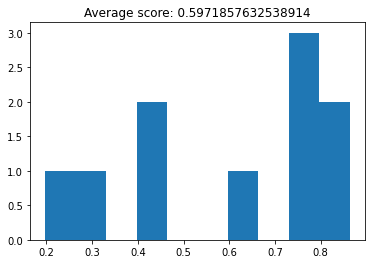

In [19]:
X, y = get_X_y(bean_data)

# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.902887873971911')

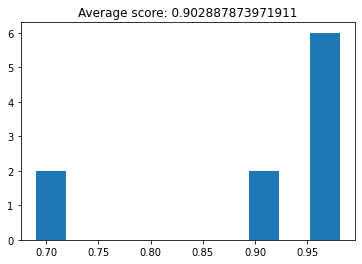

In [20]:
# Standardizing the data:
standardized_X, y = get_X_y(bean_data, scaler = StandardScaler())

svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

By comparing both histograms, it can be easily concluded that the standardization is really necessary and produces better and more consistent results.

Still the cross validation scores vary a lot based on the training data chosen. Therefore we should do some parameter tuning to see what the best parameters are for our dataset that don't overfit the data. This can be achieved by a GridSearch. This will be addressed below. 


In [21]:
parameter_grid = {
    'C': [1, 10, 50], 
    'gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# No oversampling / No feature selection
svc_original = tune_model(original_bean_data, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.8899290754940722
Best parameters: {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}


In [22]:
# No oversampling / Feature selection
svc = tune_model(bean_data, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.8945456634497869
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [23]:
parameter_grid = {
    'model__C': [1, 10, 50], 
    'model__gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'model__kernel': ['linear', 'rbf', 'sigmoid']
}

# Oversampling / Feature Selection
svc_os_fs = tune_model(bean_data, SVC(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8918586491677669
Best parameters: {'model__C': 10, 'model__gamma': 0.001, 'model__kernel': 'rbf'}


# K-nearest neighbours (KNN)
Just like the SVM model, the KNN model also requires the data to be standardised.

''

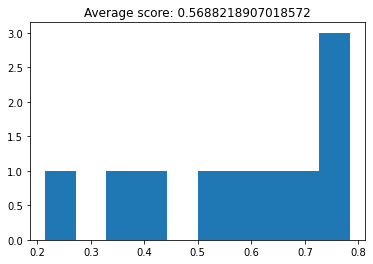

In [25]:
# Without standardizing the data
from sklearn import neighbors

X, y = get_X_y(bean_data)

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Without standardizing the data the results are simply bad.

''

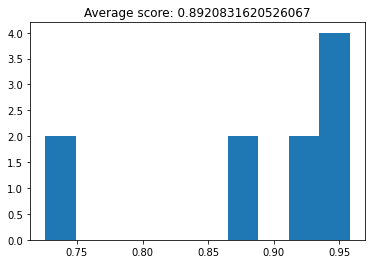

In [26]:
# Standardizing the data
standardized_X, y = get_X_y(bean_data, scaler=StandardScaler())

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Now we can run the model some times to see its efficiency with the default parameters:

In [27]:
parameter_grid =  {
    'n_neighbors':[4,5,6,7,10,15],
    'leaf_size':[5, 10, 15, 20, 50, 100],
    'n_jobs':[-1],
    'algorithm':['auto']
}

# No oversampling / No feature selection
knn = neighbors.KNeighborsClassifier()
knn_original = tune_model(original_bean_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.8846502886061742
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 10}


In [28]:
# No oversampling / Feature selection
knn = neighbors.KNeighborsClassifier()
knn = tune_model(bean_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.8919230426452321
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 15}


In [29]:
parameter_grid = {
    'model__n_neighbors':[4,5,6,7,10,15],
    'model__leaf_size':[5, 10, 15, 20, 50, 100],
    'model__n_jobs':[-1],
    'model__algorithm':['auto']
}

# Oversampling / Feature Selection
knn_os_fs = tune_model(bean_data, neighbors.KNeighborsClassifier(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8882003576800013
Best parameters: {'model__algorithm': 'auto', 'model__leaf_size': 5, 'model__n_jobs': -1, 'model__n_neighbors': 10}


# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

parameter_grid = {}

# No oversampling / No feature selection
nb_original = tune_model(original_bean_data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8627683051948699
Best parameters: {}


In [32]:
# No oversampling / Feature selection
nb = tune_model(bean_data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8639351891496304
Best parameters: {}


In [33]:
parameter_grid = {}

# Oversampling / Feature Selection
nb_os_fs = tune_model(bean_data, GaussianNB(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8610584018198087
Best parameters: {}


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

# parameter_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [8, 9, 10],
#     'n_jobs': [-1], #Use all cores
#     'max_features': ['auto', 'sqrt'],
#     'criterion': ['gini', 'entropy']
# }

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1], #Use all cores
    'max_features': ['auto'],
    'criterion': ['gini', 'entropy']
}

# No oversampling / No feature selection
rfc_original = tune_model(original_bean_data, RandomForestClassifier(), parameter_grid)

Best score: 0.7679095410230943
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10, 'n_jobs': -1}


In [36]:
# No oversampling / Feature selection
rfc = tune_model(bean_data, RandomForestClassifier(), parameter_grid)

Best score: 0.8450909070581545
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200, 'n_jobs': -1}


In [37]:
parameter_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [5, 10, 15],
    'model__n_jobs': [-1], #Use all cores
    'model__max_features': ['auto'],
    'model__criterion': ['gini', 'entropy']
}

# Oversampling / Feature Selection
rfc_os_fs = tune_model(bean_data, RandomForestClassifier(), parameter_grid, oversample=True)

Best score: 0.8494996596267738
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 'auto', 'model__n_estimators': 50, 'model__n_jobs': -1}


# Comparing Models

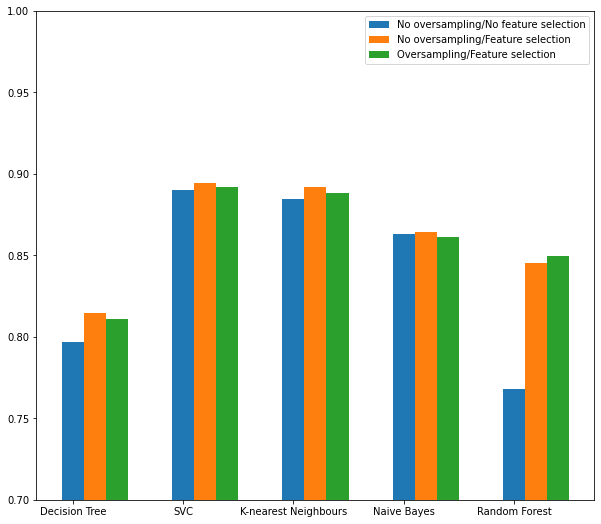

In [50]:
scores = {
    "Decision Tree" : [dt_original, dt, dt_os_fs],
    "SVC" : [svc_original, svc, svc_os_fs],
    "K-nearest Neighbours" : [knn_original, knn, knn_os_fs],
    "Naive Bayes" : [nb_original, nb, nb_os_fs],
    "Random Forest" : [rfc_original, rfc, rfc_os_fs]
}

labels = ["No oversampling/No feature selection","No oversampling/Feature selection", "Oversampling/Feature selection"]

ind = np.arange(5)

plt.figure(figsize=(10,9))
plt.bar(ind, [i[0].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2].best_score_ for i in scores.values()], 0.2)
plt.xticks(ind, scores.keys())
plt.legend(labels,loc=1)
plt.ylim(0.7, 1)
plt.show()

# Analysing times to train

Below we present a plot with the times to train each model one time

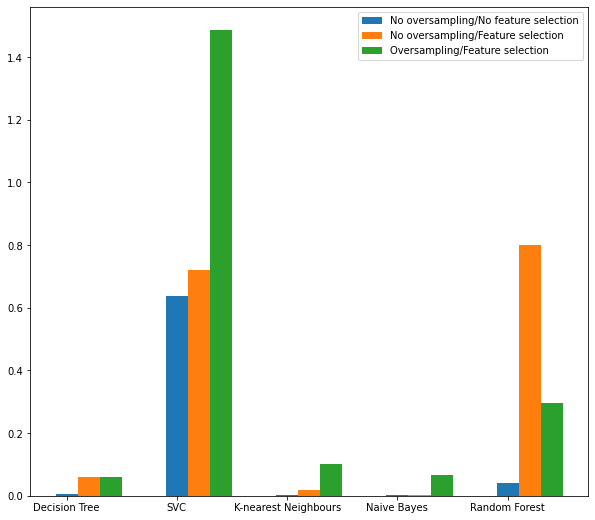

In [51]:
times = {
    "Decision Tree" : [
        measure_time(original_bean_data, DecisionTreeClassifier(), dt_original.best_params_),
        measure_time(bean_data, DecisionTreeClassifier(), dt.best_params_),
        measure_time(bean_data, DecisionTreeClassifier(), dt_os_fs.best_params_, oversample=True)
    ],
    "SVC" : [
        measure_time(original_bean_data, SVC(), svc_original.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, SVC(), svc.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, SVC(), svc_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "K-nearest Neighbours" : [
        measure_time(original_bean_data, neighbors.KNeighborsClassifier(), knn_original.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, neighbors.KNeighborsClassifier(), knn.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, neighbors.KNeighborsClassifier(), knn_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Naive Bayes" : [
        measure_time(original_bean_data, GaussianNB(), nb_original.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, GaussianNB(), nb.best_params_, scaler=StandardScaler()),
        measure_time(bean_data, GaussianNB(), nb_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Random Forest" : [
        measure_time(original_bean_data, RandomForestClassifier(), rfc_original.best_params_),
        measure_time(bean_data, RandomForestClassifier(), rfc.best_params_),
        measure_time(bean_data, RandomForestClassifier(), rfc_os_fs.best_params_, oversample=True)
    ]
}

labels = ["No oversampling/No feature selection","No oversampling/Feature selection", "Oversampling/Feature selection"]

ind = np.arange(5)

plt.figure(figsize=(10,9))
plt.bar(ind, [i[0] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2] for i in times.values()], 0.2)
plt.xticks(ind, times.keys())
plt.legend(labels,loc=1)

# plt.ylim(0.7, 1)
plt.show()

# Conclusion

The proposed work was to test and compare different Supervised Machine Learning models for classification of the Dry beans dataset. The tested models were **Decision Tree**, **Support Vector Machines**, **K-nearest Neighbours**, **Naive Bayes** and **Random Forest**. 

After some exploratory data analysis we decided to drop some features based on their correlation with each other. This proved to be only effective in the **Naive Bayes** and **Random Forest Classifiers**. 

To evaluate each model and choose the best parameters for each one, we used SKLearn's GridSearchCV to test different set of parameters. To score the models we used **f1 wighted score**. We also tried combining oversampling with and without feature selection. Looking at the benchmarks we can conclude that oversampling does not improve the scores on our models while increasing significantly the training time. 

In terms of scoring, it can be concluded that the best models for our classification problem is the **Support Vector Machine**, followed closely by the **K-nearest Neighbors**. However when we take a look at the time needed to train each model, the **Support Vector Machine** takes much longer than **K-nearest Neighbours**, making **K-nearest neighbours** the best model overall. This appears to be related to the fact that **K-nearest Neighbours** can be trained with the flag n_jobs=-1 which makes it use all the cores in the CPU while **Support Vector Machine** does not support this option.